# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

In [41]:
def read_img(path):
    img = cv2.imread(path)    
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

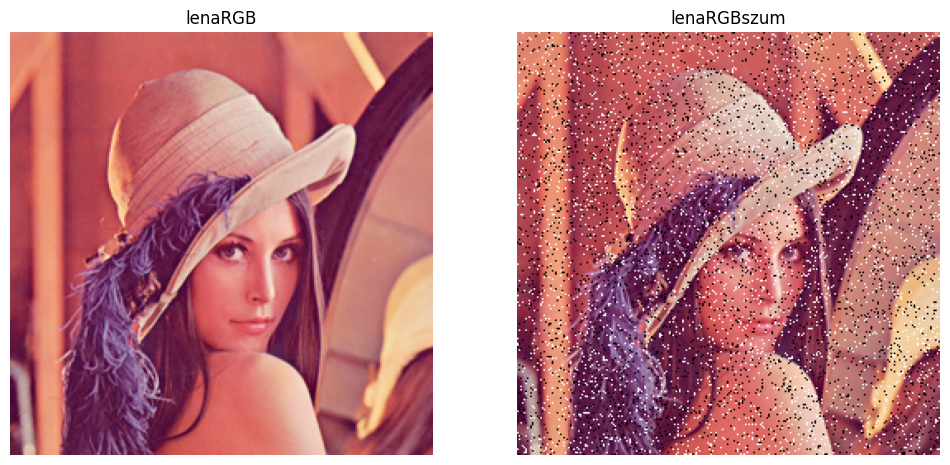

In [48]:
lenaRGB = read_img('lenaRGB.png')
lenaRGBszum = read_img('lenaRGBSzum.png')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(lenaRGB)
plt.axis('off')
plt.title('lenaRGB')

plt.subplot(1, 2, 2)
plt.imshow(lenaRGBszum)
plt.axis('off')
plt.title('lenaRGBszum')

plt.show()

In [43]:
def median_filter_color(image, window_size):
    h, w, c = image.shape
    margin = window_size // 2
    filtered_image = np.zeros_like(image)
    
    for row in range(margin, h - margin):
        for col in range(margin, w - margin):
            window = image[row - margin : row + margin + 1, col - margin : col + margin + 1]
            distances = np.zeros((window_size, window_size))
            
            for pixelRow in range(window_size):
                for pixelCol in range(window_size):
                    diffs = window - window[pixelRow, pixelCol]
                    squared_diffs = np.square(diffs)
                    distances[pixelRow, pixelCol] = np.sqrt(squared_diffs.sum())

            min_index = np.argmin(distances)
            median_pixel = window[np.unravel_index(min_index, (window_size, window_size))]
            filtered_image[row, col] = median_pixel

    return filtered_image

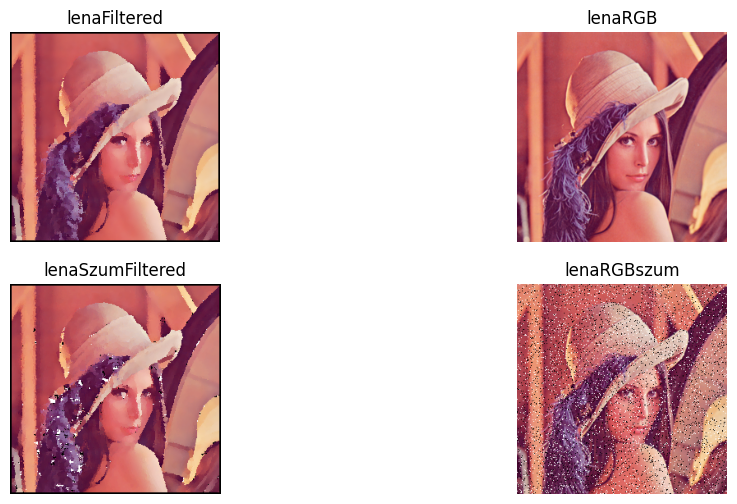

In [51]:
lenaSzumFiltered = median_filter_color(lenaRGBszum, 5)
lenaFiltered = median_filter_color(lenaRGB, 5)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(lenaFiltered)
plt.axis('off')
plt.title('lenaFiltered')

plt.subplot(2, 2, 2)
plt.imshow(lenaRGB)
plt.axis('off')
plt.title('lenaRGB')

plt.subplot(2, 2, 3)
plt.imshow(lenaSzumFiltered)
plt.axis('off')
plt.title('lenaSzumFiltered')

plt.subplot(2, 2, 4)
plt.imshow(lenaRGBszum)
plt.axis('off')
plt.title('lenaRGBszum')

plt.show()